# Classificazione origine degli oli dataset VOCs semplificato

In [90]:
# librerie di base
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler
# librerie algoritmi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [91]:
np.random.seed(42)

### Caricamento del Dataset semplificato

In [92]:
df = pd.read_csv('../dataset/df_media_TIC_VOCs_min_1-40_semplificato.csv')
#df

In [93]:
X = df.iloc[:, 2:]
y_origine = df.iloc[:,0]
# creazione di una versione scalata dei dati
scaler = MinMaxScaler()
X_scalati = scaler.fit_transform(X)

### Calcoliamo i pesi delle classi creando un dizionario

In [94]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_origine), y=y_origine)
class_weight_dizionario = dict(zip(np.unique(y_origine), class_weights))
class_weight_dizionario

{'grecia - peloponneso': 1.9583333333333333,
 'grecia-creta': 1.0681818181818181,
 'italia': 1.6206896551724137,
 'spagna': 0.5164835164835165}


### Creiamo 5 liste vuote per salvare le metriche di valutazione del modello in modo tale da poterle stampare in un grafico successivamente

In [95]:
nome_modelli = []
accuratezze = []
precisioni_medie = []
recall_medie = []
f1_measure_medie = []

## Test di KNN con validazione incrociata

### KNN

In [96]:
# istanzio il modello e faccio cross-validation
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9093567251461987


                      precision    recall  f1-score   support

grecia - peloponneso       0.73      0.79      0.76        24
        grecia-creta       0.84      0.98      0.91        44
              italia       0.96      0.83      0.89        29
              spagna       0.99      0.93      0.96        91

            accuracy                           0.91       188
           macro avg       0.88      0.88      0.88       188
        weighted avg       0.92      0.91      0.91       188



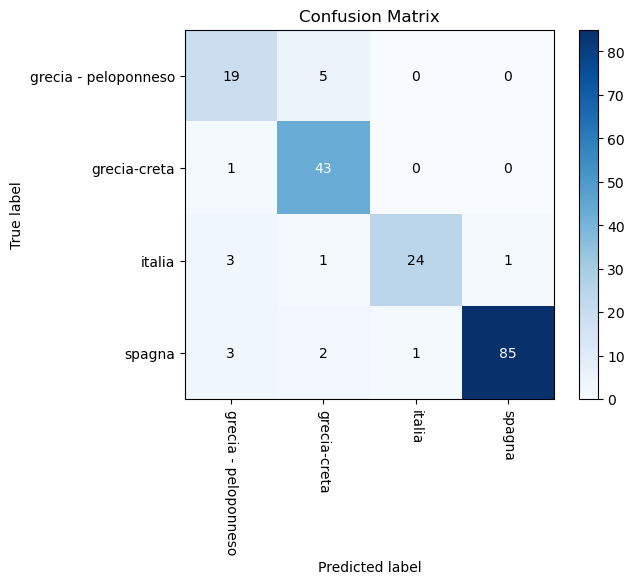

In [97]:
predizioni = cross_val_predict(knn, X, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [98]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('KNN')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)
print(nome_modelli)
print(accuratezze)
print(precisioni_medie)
print(recall_medie)
print(f1_measure_medie)

['KNN']
[91.0]
[88.0]
[88.0]
[88.0]


### KNN con dati scalati

In [99]:
knn_scale = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
scores

Media: 0.877485380116959


array([0.84210526, 0.84210526, 0.73684211, 0.89473684, 0.94736842,
       0.94736842, 0.84210526, 1.        , 0.83333333, 0.88888889])

## SVM (SVC) con validazione incrociata

### SVC

In [100]:
svc = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9362573099415205


### SVC con dati scalati

In [101]:
svc_scale = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9204678362573098


### SVC con dati scalati e bilanciamento del modello

In [102]:
svc_w_scale = SVC(kernel='poly', C=1, class_weight=class_weight_dizionario)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_w_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9312865497076024


                      precision    recall  f1-score   support

grecia - peloponneso       0.91      0.88      0.89        24
        grecia-creta       0.86      0.98      0.91        44
              italia       0.96      0.90      0.93        29
              spagna       0.97      0.93      0.95        91

            accuracy                           0.93       188
           macro avg       0.93      0.92      0.92       188
        weighted avg       0.93      0.93      0.93       188



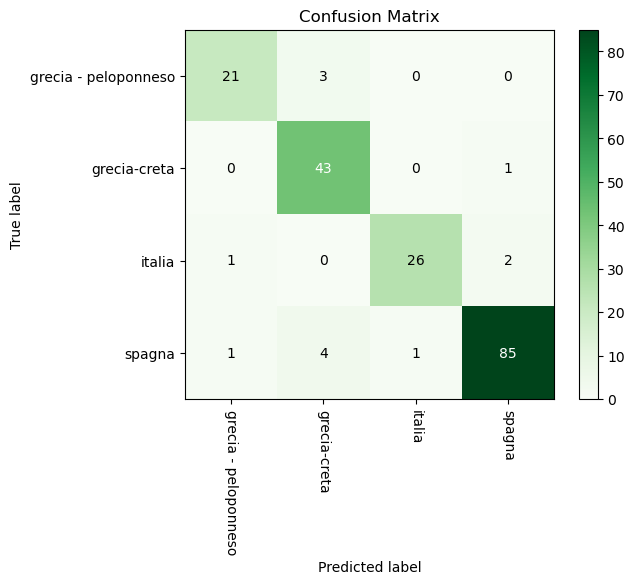

In [103]:
predizioni = cross_val_predict(svc_w_scale, X_scalati, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni, cmap=plt.cm.Greens)
plt.xticks(rotation=-90)
plt.show()

In [104]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('SVC_scale_weight')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)
print(nome_modelli)
print(accuratezze)
print(precisioni_medie)
print(recall_medie)
print(f1_measure_medie)

['KNN', 'SVC_scale_weight']
[91.0, 93.0]
[88.0, 93.0]
[88.0, 92.0]
[88.0, 92.0]


## Random Forest con validazione incrociata

### Random Forest

In [105]:
rand_for = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9260233918128655


### Random Forest con dati scalati

In [106]:
rand_for_scale = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9154970760233917


### Random Forest con dati normali e con bilanciamento del modello

In [107]:
rand_for_w = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
scores

Media: 0.9263157894736842


array([0.73684211, 0.89473684, 1.        , 0.94736842, 0.89473684,
       0.89473684, 0.89473684, 1.        , 1.        , 1.        ])

                      precision    recall  f1-score   support

grecia - peloponneso       0.91      0.83      0.87        24
        grecia-creta       0.91      0.91      0.91        44
              italia       0.93      0.90      0.91        29
              spagna       0.94      0.97      0.95        91

            accuracy                           0.93       188
           macro avg       0.92      0.90      0.91       188
        weighted avg       0.93      0.93      0.92       188



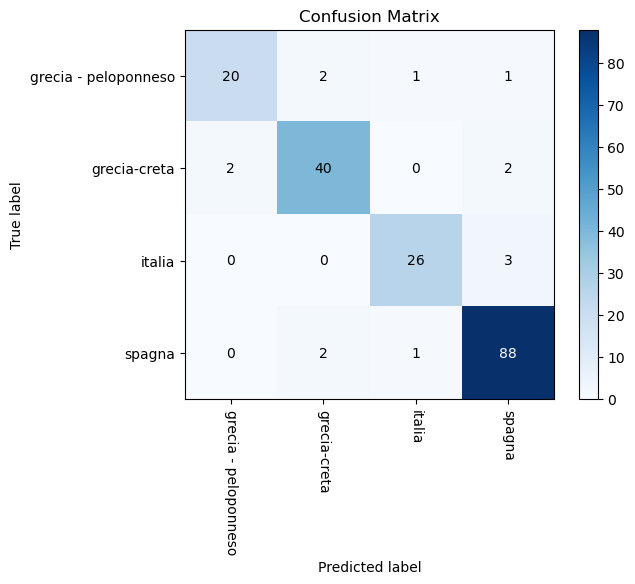

In [110]:
predizioni = cross_val_predict(rand_for_w, X_scalati, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [112]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('Random_Forest_scale')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)
print(nome_modelli)
print(accuratezze)
print(precisioni_medie)
print(recall_medie)
print(f1_measure_medie)

['KNN', 'SVC_scale_weight', 'Random_Forest_scale']
[91.0, 93.0, 93.0]
[88.0, 93.0, 92.0]
[88.0, 92.0, 90.0]
[88.0, 92.0, 91.0]


## Dopo questi primi test possiamo vedere come SVC con dati scalati tra 0 e 1 e con i pesi delle classi da i risultati migliori con un'accuratezza di 93%

##### Test di Decision Tree e Naive Bayes anche se inutile dati i risultati precedenti

In [113]:
dec_tree = DecisionTreeClassifier(class_weight=class_weight_dizionario)
scores = cross_val_score(dec_tree, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7985380116959064


In [114]:
nai_bay = GaussianNB()
scores = cross_val_score(nai_bay, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7964912280701755


# Costruzione del grafico finale

In [115]:
tabella_risultati = pd.DataFrame({'Modello': nome_modelli, 'Accuratezza': accuratezze, 'Precisione media': precisioni_medie, 'Recall media': recall_medie, 'F1-score media': f1_measure_medie})

In [116]:
tabella_risultati.iloc[:, 1:] = tabella_risultati.iloc[:, 1:].astype(int)
tabella_risultati

,Modello,Accuratezza,Precisione media,Recall media,F1-score media
0,KNN,91,88,88,88
1,SVC_scale_weight,93,93,92,92
2,Random_Forest_scale,93,92,90,91


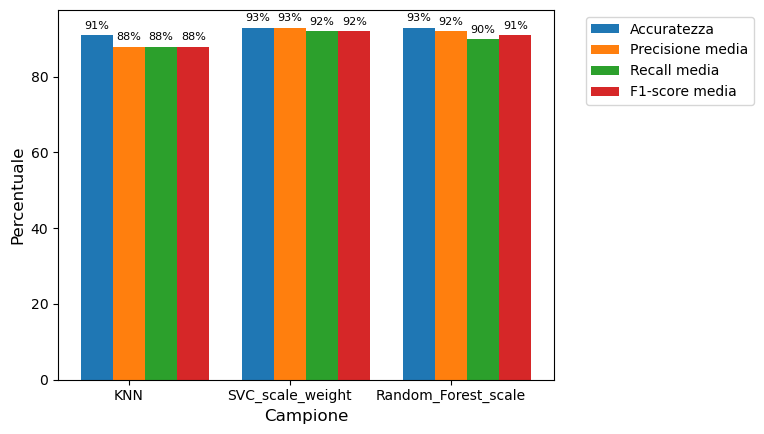

In [117]:
campioni = tabella_risultati['Modello']
percentuali = np.array([tabella_risultati.iloc[0, 1:], tabella_risultati.iloc[1, 1:], tabella_risultati.iloc[2, 1:]])

# creiamo il grafico
x = np.arange(len(campioni))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, percentuali[:,0], width, label='Accuratezza')
rects2 = ax.bar(x, percentuali[:,1], width, label='Precisione media')
rects3 = ax.bar(x + width, percentuali[:,2], width, label='Recall media')
rects4 = ax.bar(x + 2*width, percentuali[:,3], width, label='F1-score media')

ax.set_ylabel('Percentuale', fontsize=12)
ax.set_xlabel('Campione', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(campioni, fontsize=10)

# aggiungiamo il testo con il valore numerico sopra ogni rettangolo
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.legend(fontsize=10)

# posizioniamo la legenda al di fuori del grafico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()
